# The Heisenberg Model (3D Spins)

In [1]:
include("../src/heisenberg.jl")
import CairoMakie as cm
import LsqFit as lsq
using JLD2
using ProgressMeter
import StatsBase as sb
import Distributions as dist

## Task 1: find the critical temperature
Todo: fit susceptibility with a bell curve to get the peak position ($T_c$)

Progress: 100%|█████████████████████████████████████████| Time: 0:12:45


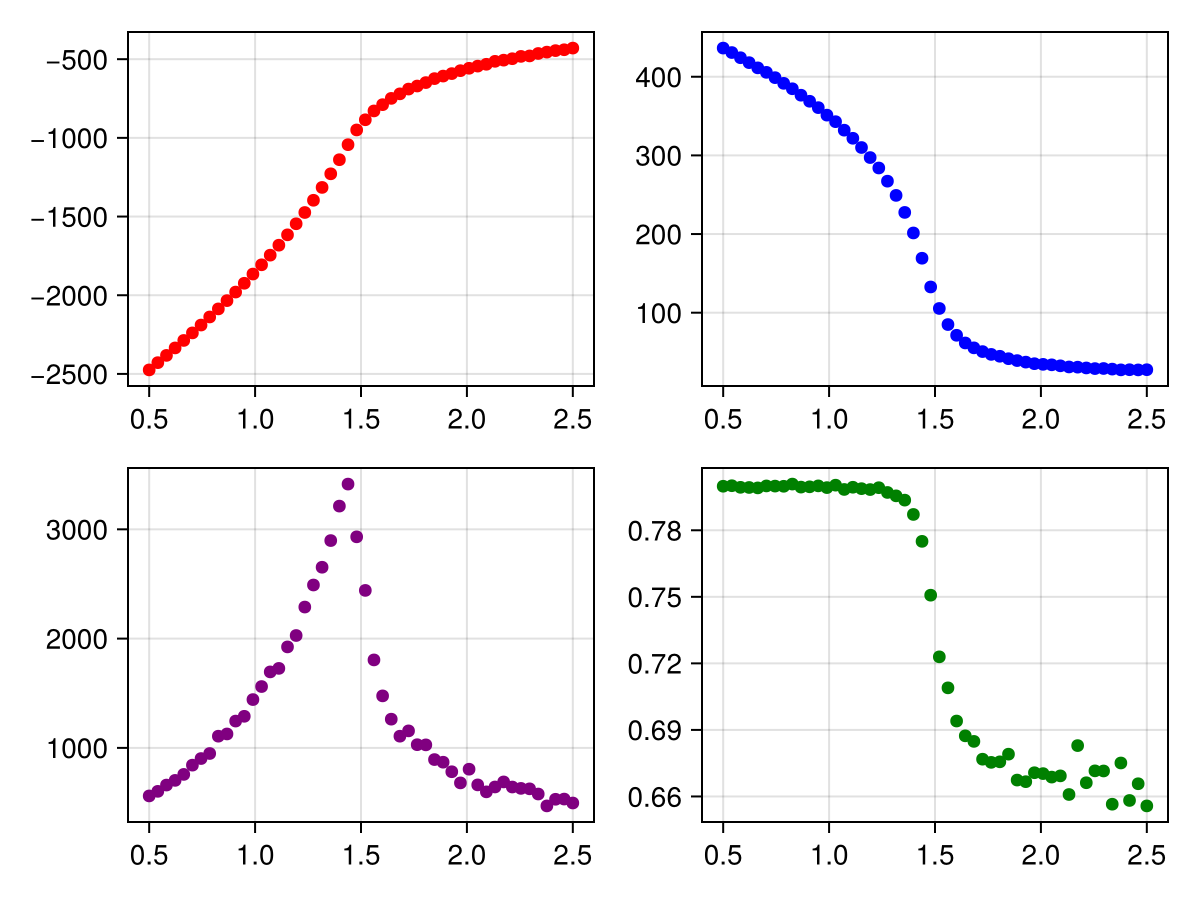

In [2]:
# using Wolff
temps, energies, magnetisations, binder_cumulants = temp_sweep(grid_size=10,T_min=0.5,T_max=2.5, T_Steps=50,mc_algo=wolff_step, N_Subsweep=10)
fig = cm.Figure()
cm.plot(fig[1, 1], temps, energies[1], color=:red, label="Energy")
cm.plot(fig[1, 2], temps, magnetisations[1], color=:blue, label="Magnetisation")
cm.plot(fig[2, 1], temps, energies[2].^2 ./temps, color=:purple, label="Susceptibility")
cm.plot(fig[2, 2], temps, binder_cumulants, color=:green, label="Binder Cumulant")
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:07:21


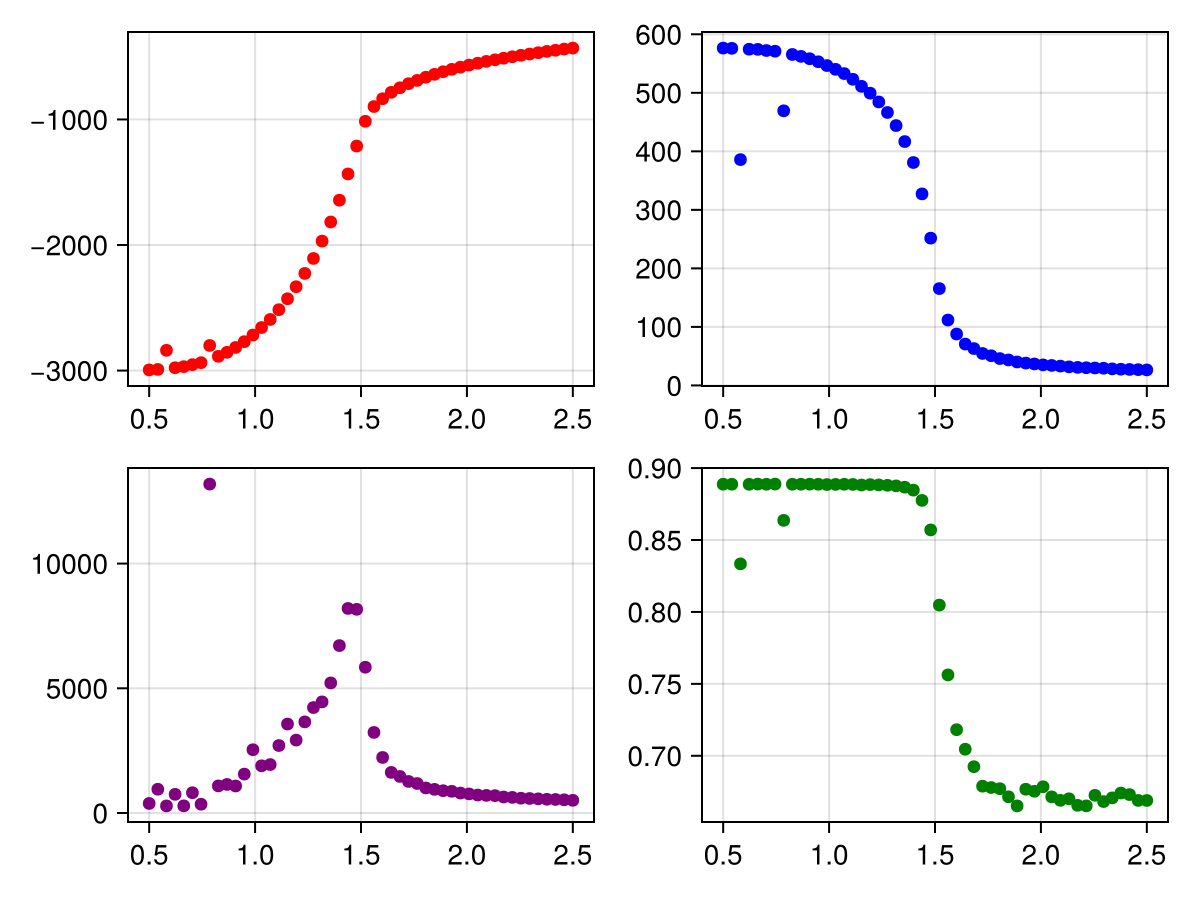

In [3]:
# using metropolis
temps, energies, magnetisations, binder_cumulants = temp_sweep(grid_size=10,T_min=0.5,T_max=2.5, T_Steps=50,mc_algo=metropolis_step)
fig = cm.Figure()
cm.plot(fig[1, 1], temps, energies[1], color=:red, label="Energy")
cm.plot(fig[1, 2], temps, magnetisations[1], color=:blue, label="Magnetisation")
cm.plot(fig[2, 1], temps, energies[2].^2 ./temps, color=:purple, label="Susceptibility")
cm.plot(fig[2, 2], temps, binder_cumulants, color=:green, label="Binder Cumulant")
fig

## Task 2: Autocorrelation time and it's critical exponent

In [4]:
function measure_grid_ensemble(; grid_sizes::Array{Int,1}, J::Float64=1.0, T::Float64=0.0, N_Sample::Int=10_000, N_Subsweep::Int=3_000, mc_algo::Function=metropolis_step)
    energies, magnetisations = Array{Array{Float64,1},1}(undef, length(grid_sizes)), Array{Array{Float64,1},1}(undef, length(grid_sizes))
    @showprogress Threads.@threads for (i, grid_size) in collect(enumerate(grid_sizes))
        grid = thermalize_grid(grid_size=grid_size, J=J, T=T, N=N_Subsweep*grid_size^3, mc_algo=mc_algo)
        energies_, magnetisations_ = sample_grid(grid, T=T, J=J, N_Subsweep=N_Subsweep, N_Sample=N_Sample, mc_algo=mc_algo)
        energies[i] = energies_
        magnetisations[i] = mean(magnetisations_)
    end
    return energies, magnetisations
end

measure_grid_ensemble (generic function with 1 method)

In [5]:
Tc = 1.443
grid_sizes = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24];

In [6]:
acm_energy, acm_mag = measure_grid_ensemble(grid_sizes=grid_sizes, T=Tc, mc_algo=metropolis_step,N_Sample=50_000)

Progress: 100%|█████████████████████████████████████████| Time: 0:17:10


([[-1370.6666666666629, -1326.6666666666629, -1351.9999999999961, -1329.3333333333294, -1347.999999999996, -1343.999999999996, -1391.999999999996, -1339.999999999996, -1337.3333333333292, -1365.3333333333292  …  -1357.3333333333314, -1455.999999999998, -1471.999999999998, -1471.999999999998, -1591.999999999998, -1537.3333333333312, -1502.6666666666645, -1469.3333333333312, -1537.3333333333312, -1479.999999999998], [-1702.333333333312, -1775.6666666666454, -1782.333333333312, -1780.9999999999789, -1806.333333333312, -1776.9999999999789, -1768.9999999999789, -1779.6666666666456, -1820.9999999999789, -1763.6666666666456  …  -2006.3333333333374, -1985.000000000004, -1869.000000000004, -1889.000000000004, -1905.000000000004, -1805.000000000004, -1793.000000000004, -1823.6666666666708, -1797.000000000004, -1797.000000000004], [-2399.9999999999995, -2446.666666666666, -2463.9999999999995, -2494.666666666666, -2470.666666666666, -2474.666666666666, -2473.3333333333326, -2467.999999999999, -255

In [7]:
i=15

15

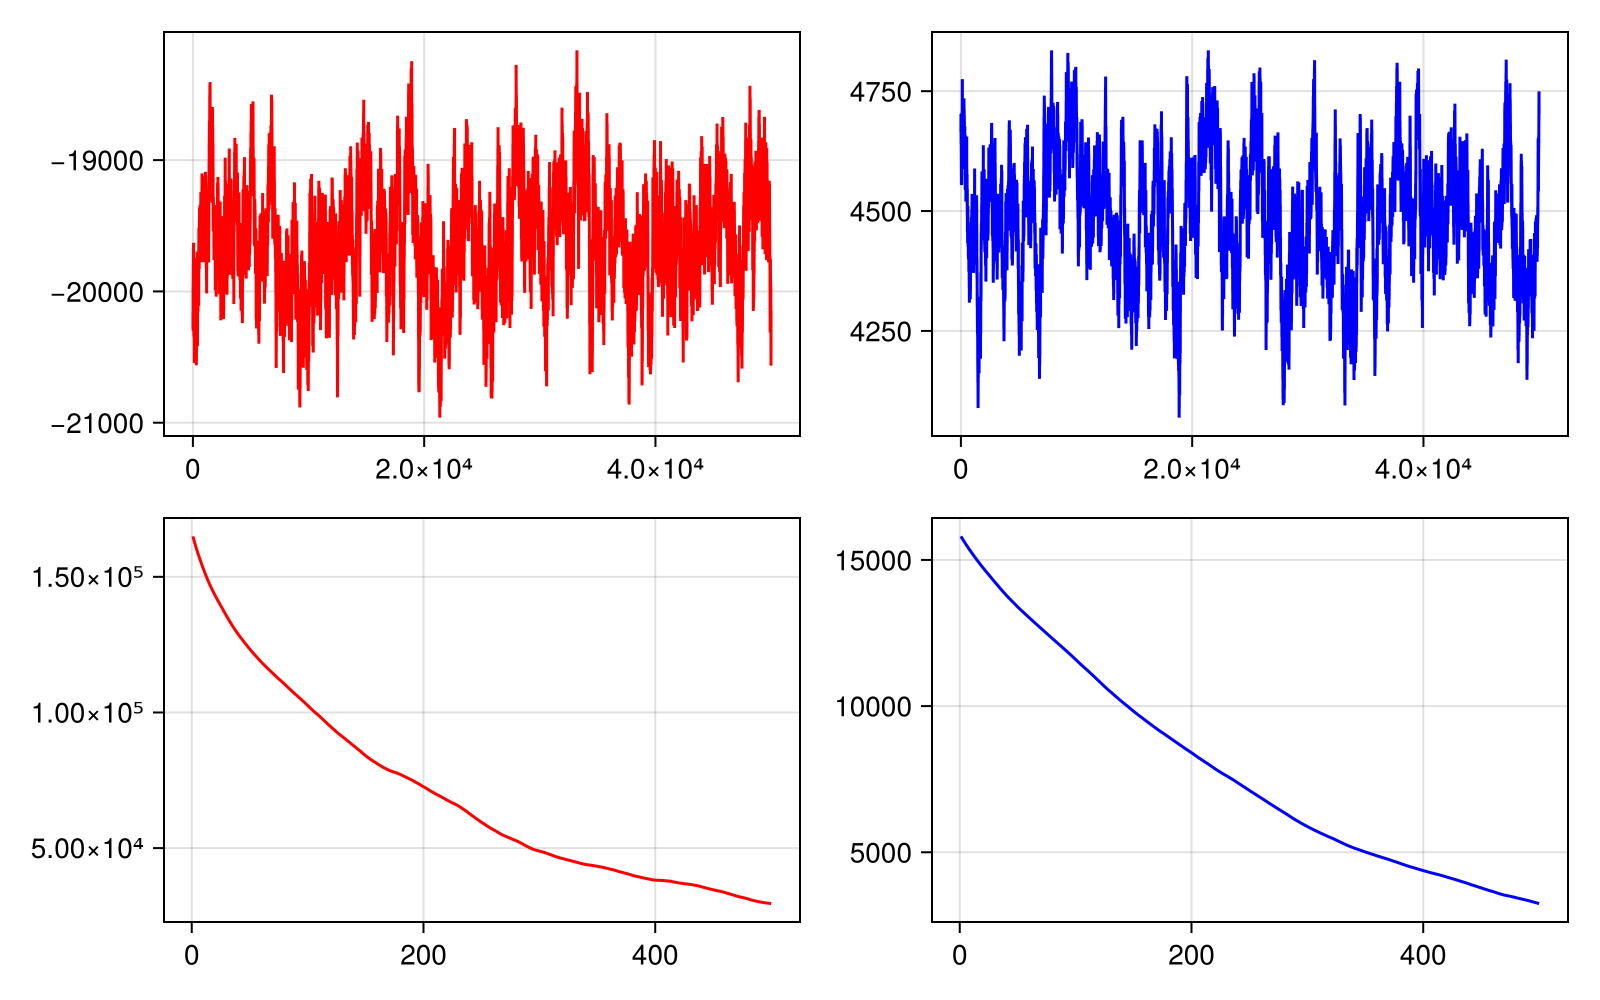

In [8]:
fig = cm.Figure(size=(800, 500))
cm.lines(fig[1, 1], acm_energy[i], color=:red, label="Energy")
cm.lines(fig[1, 2], acm_mag[i], color=:blue, label="Magnetisation")
cm.lines(fig[2, 1], autocorr(acm_energy[i],max_lag=500), color=:red, label="Energy")
cm.lines(fig[2, 2], autocorr(acm_mag[i],max_lag=500), color=:blue, label="Magnetisation")
fig

In [9]:
get_ac_time(autocorr(acm_energy[i],max_lag=500)), get_ac_time(autocorr(acm_mag[i],max_lag=500))

(132.92505155336707, 148.66252096561433)

In [10]:
acw_energy, acw_mag = measure_grid_ensemble(grid_sizes=grid_sizes, T=Tc, mc_algo=wolff_step,N_Sample=100_000, N_Subsweep=1)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:20


([[-1091.8756788626777, -1091.3937791868473, -1100.1022865843001, -1072.6077335571597, -1070.5402512847554, -1045.4328828142236, -1044.8313830186942, -1048.618222997931, -1048.070322583835, -1056.0079733975201  …  -1160.9192209061996, -1160.4103741321505, -1169.282899209139, -1168.563596544436, -1165.6547755026613, -1165.708987033904, -1170.1427111529456, -1153.1286493911714, -1152.3981879995138, -1150.3439616552425], [-1457.8550835841095, -1459.2221013279916, -1457.708828697534, -1458.8873963819174, -1458.093708279897, -1458.0193585460438, -1457.5813478340438, -1333.8463506022122, -1366.6321853852078, -1294.903818187461  …  -1402.3174251849118, -1414.9961482444746, -1426.118282867667, -1425.6229111340426, -1420.9668472040994, -1418.489640994309, -1374.275990954905, -1365.702707639372, -1363.8668077773195, -1364.415369795792], [-1685.8707616844056, -1686.5963661148674, -1686.0423726823105, -1685.5624281346772, -1683.702800679998, -1660.2512157333565, -1562.5969973935228, -1567.81904861

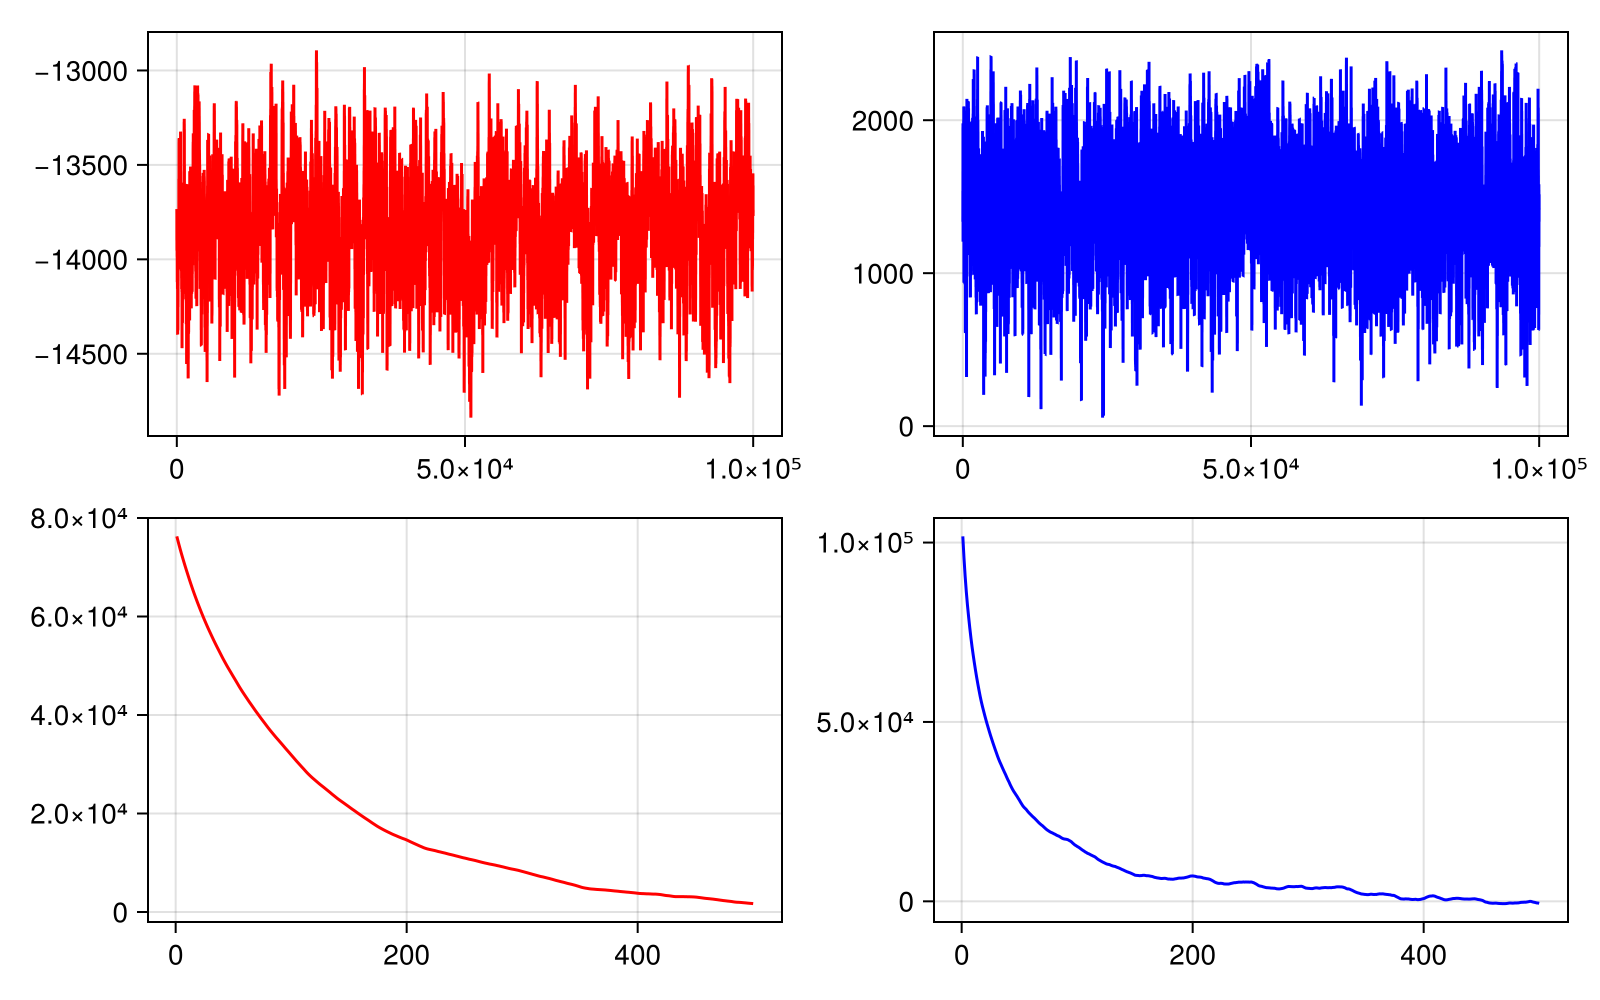

In [11]:
fig = cm.Figure(size=(800, 500))
cm.lines(fig[1, 1], acw_energy[i], color=:red, label="Energy")
cm.lines(fig[1, 2], acw_mag[i], color=:blue, label="Magnetisation")
cm.lines(fig[2, 1], autocorr(acw_energy[i],max_lag=500), color=:red, label="Energy")
cm.lines(fig[2, 2], autocorr(acw_mag[i],max_lag=500), color=:blue, label="Magnetisation")
fig

### gather autocorrelation times

In [12]:
function ac_grids(; grid_sizes::Array{Int,1}, energies::Array{Array{Float64,1},1}, magnetisations:: Array{Array{Float64,1},1},max_lag::Int=50)
    ac_times = Array{Float64,1}(undef, length(grid_sizes))
    for (i, grid_size) in enumerate(grid_sizes)
        e_ac = get_ac_time(autocorr(energies[i],max_lag=max_lag))
        m_ac = get_ac_time(autocorr(magnetisations[i],max_lag=max_lag))
        ac_times[i] = mean([e_ac, m_ac])
    end
    return ac_times
end

ac_grids (generic function with 1 method)

In [13]:
m_times = ac_grids(grid_sizes=grid_sizes, energies=acm_energy, magnetisations=acm_mag, max_lag=200)

15-element Vector{Float64}:
 15.676294649517262
 19.38489312473596
 21.615483892512817
 23.708272536398994
 22.47814856066023
 24.931491376274856
 22.337524591132656
 25.332967281268104
 24.32673075035263
 24.19153338131912
 25.548720736837492
 25.039772069885046
 24.53521713248328
 26.506387317991653
 25.963203024685512

In [14]:
w_times = ac_grids(grid_sizes=grid_sizes, energies=acw_energy, magnetisations=acw_mag, max_lag=200)

15-element Vector{Float64}:
 19.17703257671409
 21.663533288012363
 21.079419250211714
 20.506296815497667
 21.399233991104502
 19.84921615304764
 21.247861961579527
 23.151735979500234
 21.971826148532536
 20.39973416999306
 22.386348645713966
 20.015989894376986
 22.995425227314232
 22.145033760821597
 23.025241270082027

[8.816865388237526, -1.2387302928433297]
[2.442469728989414, 14.564797470838677]


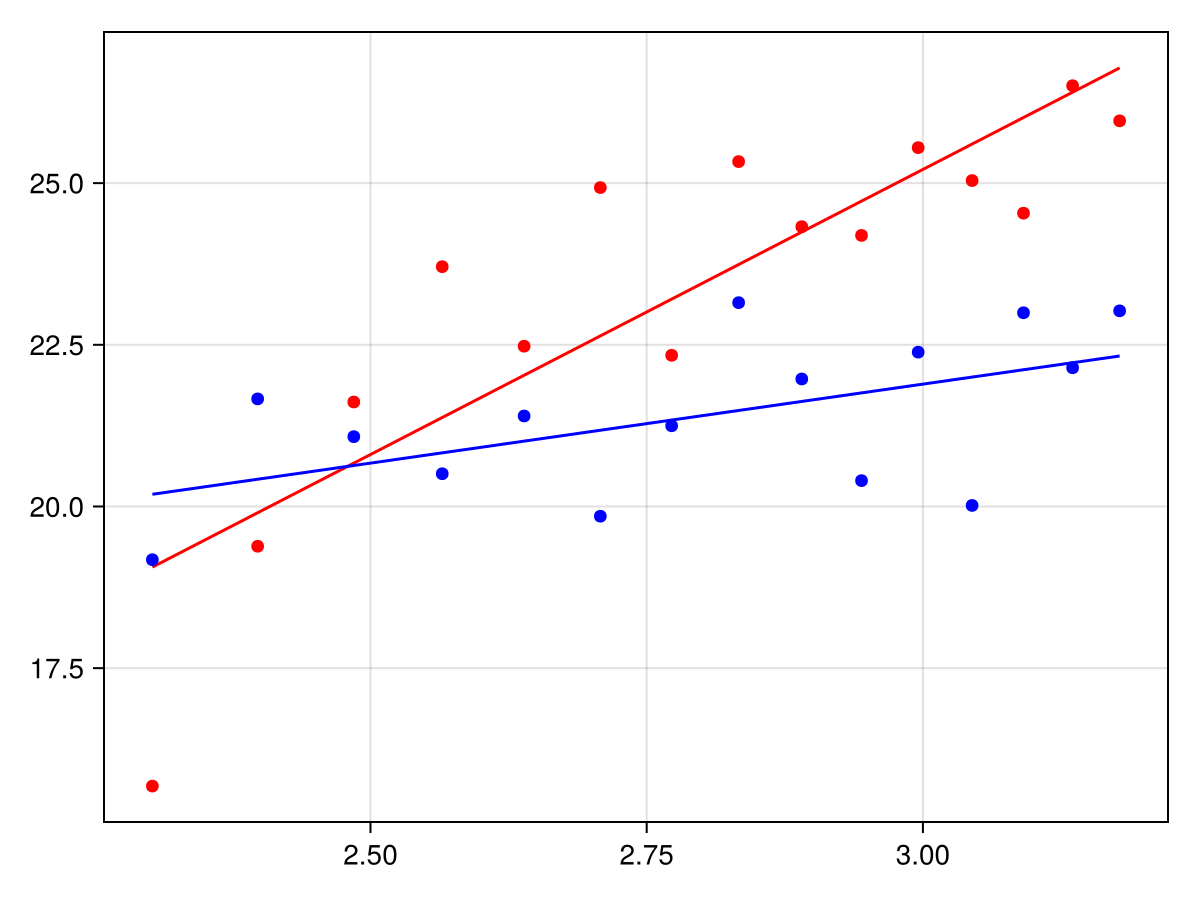

In [20]:
linfit(x,p)= (p[1] * x ) .+ p[2]

p0 = [8.0, 0.0]

x = log.(grid_sizes)
# y = mean([m_times, w_times])
m_fit = lsq.curve_fit(linfit, x, m_times, p0)
w_fit = lsq.curve_fit(linfit, x, w_times, p0)
println(m_fit.param)
println(w_fit.param)

fig = cm.Figure()
ax = cm.Axis(fig[1, 1])
cm.plot!(ax, x, m_times, color=:red, label="Metropolis")
cm.lines!(ax, x, linfit(x, m_fit.param), color=:red)
cm.plot!(ax, x, w_times, color=:blue, label="Wolff")
cm.lines!(ax, x, linfit(x, w_fit.param), color=:blue)
fig